In [2]:
# Python3 implementation of the above approach
from random import randint
import numpy as np
import matplotlib.pyplot as plt


Initial population: 
GNOME     FITNESS VALUE

032140 2147483647
032140 2147483647
032140 2147483647
032140 2147483647
032140 2147483647
032140 2147483647
032140 2147483647
032140 2147483647
032140 2147483647
032140 2147483647


Current temp:  10000
Generation 1
GNOME     FITNESS VALUE
034120 2147483647
023140 2147483647
031240 32
042130 32
012340 24
032410 2147483647
042130 32
023140 2147483647
034120 2147483647
034120 2147483647

Current temp:  9000.0
Generation 2
GNOME     FITNESS VALUE
012430 31
013240 21
042310 21
042310 21
031420 2147483647
043120 2147483647
023410 2147483647
023410 2147483647
024130 2147483647
031420 2147483647

Current temp:  8100.0
Generation 3
GNOME     FITNESS VALUE
043210 24
012340 24
043210 24
042130 32
032410 2147483647
023140 2147483647
023140 2147483647
032410 2147483647
021430 2147483647
021430 2147483647

Current temp:  7290.0
Generation 4
GNOME     FITNESS VALUE
034210 31
012430 31
013240 21
042310 21
032140 2147483647
021340 2147483647
024130 214748

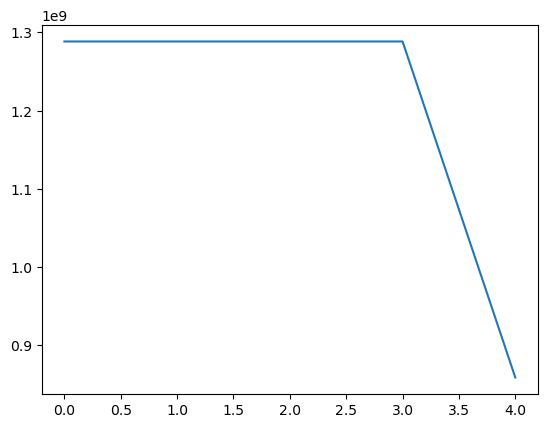

In [6]:


INT_MAX = 2147483647
# Number of cities in TSP
V = 5

# Names of the cities
GENES = "ABCDE"

# Starting Node Value
START = 0

# Initial population size for the algorithm
POP_SIZE = 10

# Structure of a GNOME
# defines the path traversed
# by the salesman while the fitness value
# of the path is stored in an integer


class individual:
    def __init__(self) -> None:
        self.gnome = ""
        self.fitness = 0

    def __lt__(self, other):
        return self.fitness < other.fitness

    def __gt__(self, other):
        return self.fitness > other.fitness


# Function to return a random number
# from start and end
def rand_num(start, end):
    return randint(start, end-1)


# Function to check if the character
# has already occurred in the string
def repeat(s, ch):
    for i in range(len(s)):
        if s[i] == ch:
            return True

    return False


# Function to return a mutated GNOME
# Mutated GNOME is a string
# with a random interchange
# of two genes to create variation in species
def mutatedGene(gnome):
    gnome = list(gnome)
    while True:
        r = rand_num(1, V)
        r1 = rand_num(1, V)
        if r1 != r:
            temp = gnome[r]
            gnome[r] = gnome[r1]
            gnome[r1] = temp
            break
    return ''.join(gnome)


# Function to return a valid GNOME string
# required to create the population
def create_gnome():
    gnome = "0"
    while True:
        if len(gnome) == V:
            gnome += gnome[0]
            break

        temp = rand_num(1, V)
        if not repeat(gnome, chr(temp + 48)):
            gnome += chr(temp + 48)

    return gnome


# Function to return the fitness value of a gnome.
# The fitness value is the path length
# of the path represented by the GNOME.
def cal_fitness(gnome):
    mp = [
        [0, 2, INT_MAX, 12, 5],
        [2, 0, 4, 8, INT_MAX],
        [INT_MAX, 4, 0, 3, 3],
        [12, 8, 3, 0, 10],
        [5, INT_MAX, 3, 10, 0],
    ]
    f = 0
    for i in range(len(gnome) - 1):
        if mp[ord(gnome[i]) - 48][ord(gnome[i + 1]) - 48] == INT_MAX:
            return INT_MAX
        f += mp[ord(gnome[i]) - 48][ord(gnome[i + 1]) - 48]

    return f


# Function to return the updated value
# of the cooling element.
def cooldown(temp):
    return (90 * temp) / 100


# Comparator for GNOME struct.
# def lessthan(individual t1,
#               individual t2)
# :
#     return t1.fitness < t2.fitness


# Utility function for TSP problem.
def TSPUtil(mp):
    # Generation Number
    gen = 1
    # Number of Gene Iterations
    gen_thres = 5

    population = []
    temp = individual()

    # Populating the GNOME pool.
    for i in range(POP_SIZE):
        temp.gnome = create_gnome()
        temp.fitness = cal_fitness(temp.gnome)
        population.append(temp)

    print("\nInitial population: \nGNOME     FITNESS VALUE\n")
    for i in range(POP_SIZE):
        print(population[i].gnome, population[i].fitness)
    print()

    found = False
    temperature = 10000

    fitness_arr = []
    # Iteration to perform
    # population crossing and gene mutation.
    while temperature > 1000 and gen <= gen_thres:
        population.sort()
        print("\nCurrent temp: ", temperature)
        new_population = []

        for i in range(POP_SIZE):
            p1 = population[i]

            while True:
                new_g = mutatedGene(p1.gnome)
                new_gnome = individual()
                new_gnome.gnome = new_g
                new_gnome.fitness = cal_fitness(new_gnome.gnome)

                if new_gnome.fitness <= population[i].fitness:
                    new_population.append(new_gnome)
                    break

                else:

                    # Accepting the rejected children at
                    # a possible probability above threshold.
                    prob = pow(
                        2.7,
                        -1
                        * (
                            (float)(new_gnome.fitness - population[i].fitness)
                            / temperature
                        ),
                    )
                    if prob > 0.5:
                        new_population.append(new_gnome)
                        break

        temperature = cooldown(temperature)
        population = new_population
        print("Generation", gen)
        print("GNOME     FITNESS VALUE")

        for i in range(POP_SIZE):
            print(population[i].gnome, population[i].fitness)
        gen += 1

        fitness_avg = np.mean([i.fitness for i in population])
        fitness_arr.append(fitness_avg)
    
    plt.plot(fitness_arr)


if __name__ == "__main__":

    mp = [
        [0, 2, INT_MAX, 12, 5],
        [2, 0, 4, 8, INT_MAX],
        [INT_MAX, 4, 0, 3, 3],
        [12, 8, 3, 0, 10],
        [5, INT_MAX, 3, 10, 0],
    ]
    TSPUtil(mp)
